# Classification Models Project

### Setup imports and encode values

In [50]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shutil
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(data, name):
    le = preprocessing.LabelEncoder()
    data[name] = le.fit_transform(data[name])
    return le.classes_

## Classification Models on Titanic dataset

In [51]:
titanic_train = pd.read_csv("./titanic_train.csv")
# Drop passenger name, ticket number, cabin, embarked.
titanic_train.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
# Replace NaNs in Age with mean
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)
# Encode 'Sex' column
titanic_train['Sex'] = pd.get_dummies(titanic_train['Sex'], drop_first=True)
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
5,6,0,3,1,29.699118,0,0,8.4583
6,7,0,1,1,54.000000,0,0,51.8625
7,8,0,3,1,2.000000,3,1,21.0750
8,9,1,3,0,27.000000,0,2,11.1333
9,10,1,2,0,14.000000,1,0,30.0708


# Prepare training features and labels.

In [52]:
X_titanic = titanic_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']].values
y_titanic = titanic_train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.3, random_state=0)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train[:5]

X_train shape:  (623, 5)
X_test shape:  (268, 5)
y_train shape:  (623,)
y_test shape:  (268,)


array([[ 1.        ,  1.        , 51.        ,  0.        , 26.55      ],
       [ 1.        ,  0.        , 49.        ,  1.        , 76.7292    ],
       [ 3.        ,  1.        ,  1.        ,  5.        , 46.9       ],
       [ 1.        ,  1.        , 54.        ,  0.        , 77.2875    ],
       [ 3.        ,  0.        , 29.69911765,  1.        , 14.4583    ]])

# Apply decision tree similar to Tutorial_6_Classification.ipynb

In [53]:
from sklearn import tree

titanic_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
titanic_clf = titanic_clf.fit(X_train, y_train)

# Predict on test data
titanic_predictions = titanic_clf.predict(X_test)
titanic_predictions


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

# Plot confusion matrix for titanic classifier

Accuracy on test data is 0.82
F1 score on test data is 0.76
Precision Score on test data is 0.77
Recall score on test data is 0.74
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       168
           1       0.77      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



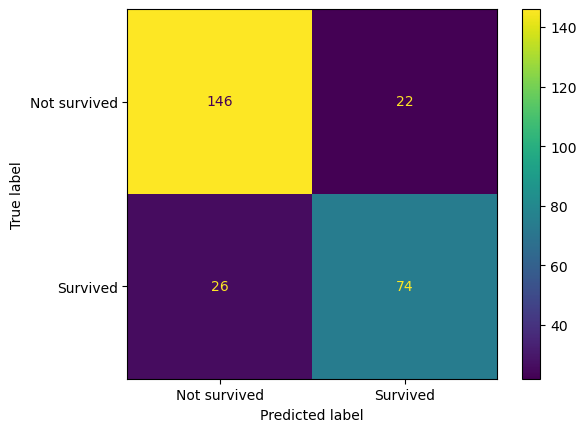

In [54]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,classification_report, ConfusionMatrixDisplay, confusion_matrix

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, titanic_predictions)))
print('F1 score on test data is %.2f' % (f1_score(y_test, titanic_predictions)))
print('Precision Score on test data is %.2f' % (precision_score(y_test, titanic_predictions)))
print('Recall score on test data is %.2f' % (recall_score(y_test, titanic_predictions)))
print( classification_report(y_test,titanic_predictions))

cm = confusion_matrix(y_test, titanic_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ["Not survived", "Survived"])
disp.plot()
plt.show()

# KNN Classifier on Titanic data

Text(0, 0.5, 'Accuracy')

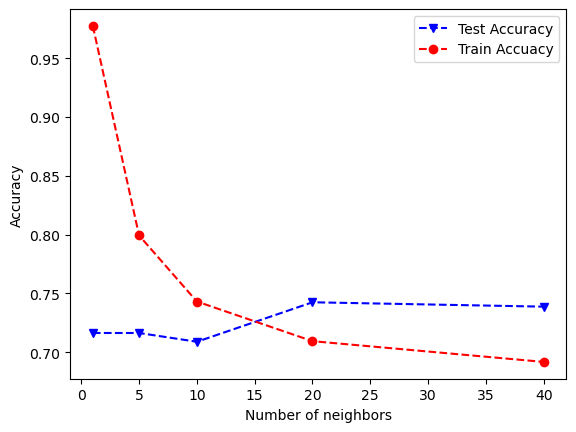

In [55]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10, 20, 40]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    knn_pred = clf.predict(X_test)
    knn_pred_train = clf.predict(X_train)
    # print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y_train,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [56]:
path = "./"
# Open .csv
filename_read = os.path.join(path,"Churn_Modelling.csv")
churn_Data = pd.read_csv(filename_read, na_values=['NA','?'])
churn_Data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [57]:
# Drop unnecessary features from the dataset.
churn_Data = churn_Data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
encode_text_index(churn_Data, 'Geography')
encode_text_index(churn_Data, 'Gender')
churn_Data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [58]:
churn_Data.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [59]:
churn_Data['Gender'] = churn_Data['Gender'].astype('int64')
churn_Data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [60]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

feature_cols = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

x = churn_Data[feature_cols]
y = churn_Data.Exited

In [61]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Building Decision Tree

Building decision trees involves making a predictive model to recursively divide feature spaces into smaller and smaller sections. 
Decision trees improves the our ability to understand how the model arrived at specific classifications by mimicking the human decision-making patterns. Since they can work on both numerical and categorical features without needing much data preprocessing they are extremely convenient to use. Decision trees also can show a measure of feature importance, which helps us identify which features are more influential in making decisions, allowing us to tweak weights and aides in feature selection. Furthermore, They can identify non-linear relationships in the data, since they do not make any assumptions about the linearity of the data. This makes them useful for datasets with intricate relationships between features and the target variable.

Decision trees have a tendency to overfit, especially when they "grow too deep" or if the dataset is noisy. They are also unstable, with massive changes in the tree if the dataset changes. They also have tendency to favor features with a lot of unique values because they can create more branches which may result in more specific rules.

In [62]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

### Evaluating Model accuracy

In [63]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8566666666666667


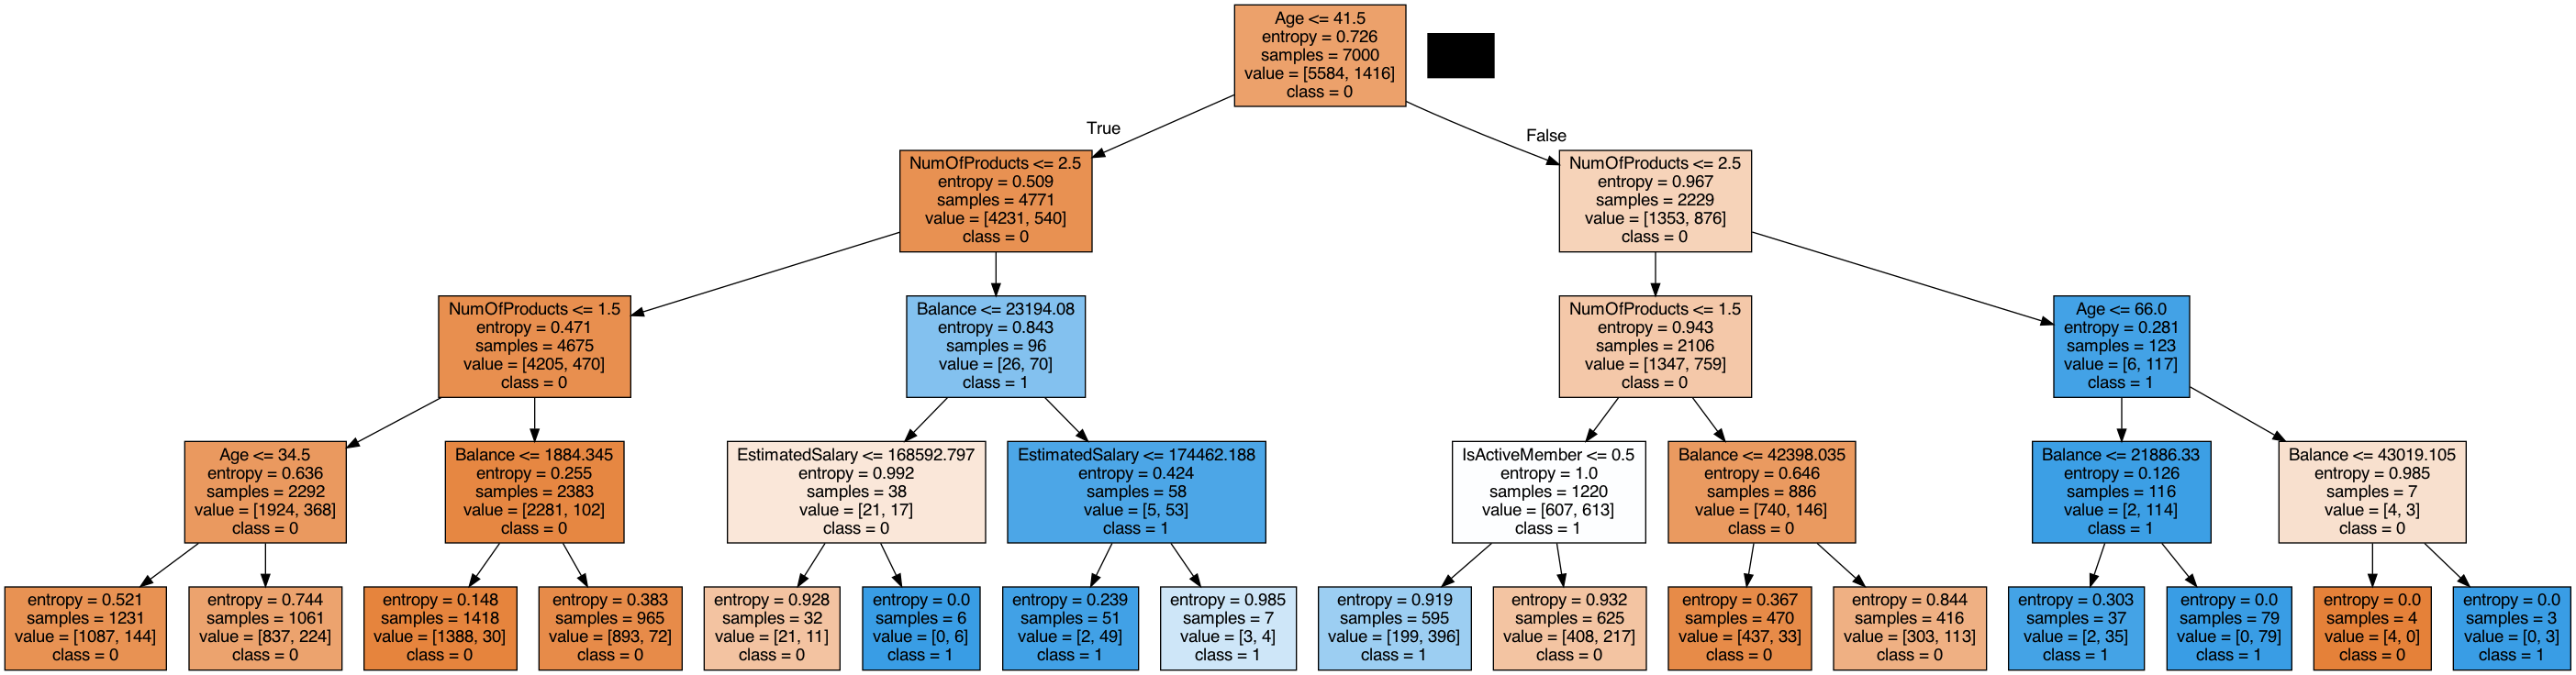

In [64]:
import pydotplus 
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, feature_names=x.columns, class_names=['0','1'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

### Removing features that doesn't provide much gain or has high entropy

The code below sets up the decision tree classifier, trains it using feature columns: 'CreditScore, 'Age', 'Balance', 'NumOfProducts', and the 'Exited' target variable. It then checks its performance on a test set and displays the accuracy achieved by the decision tree model in predicting the 'Exited' variable. 

In [65]:
feature_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']

x = churn_Data[feature_cols]
y = churn_Data.Exited

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8263333333333334


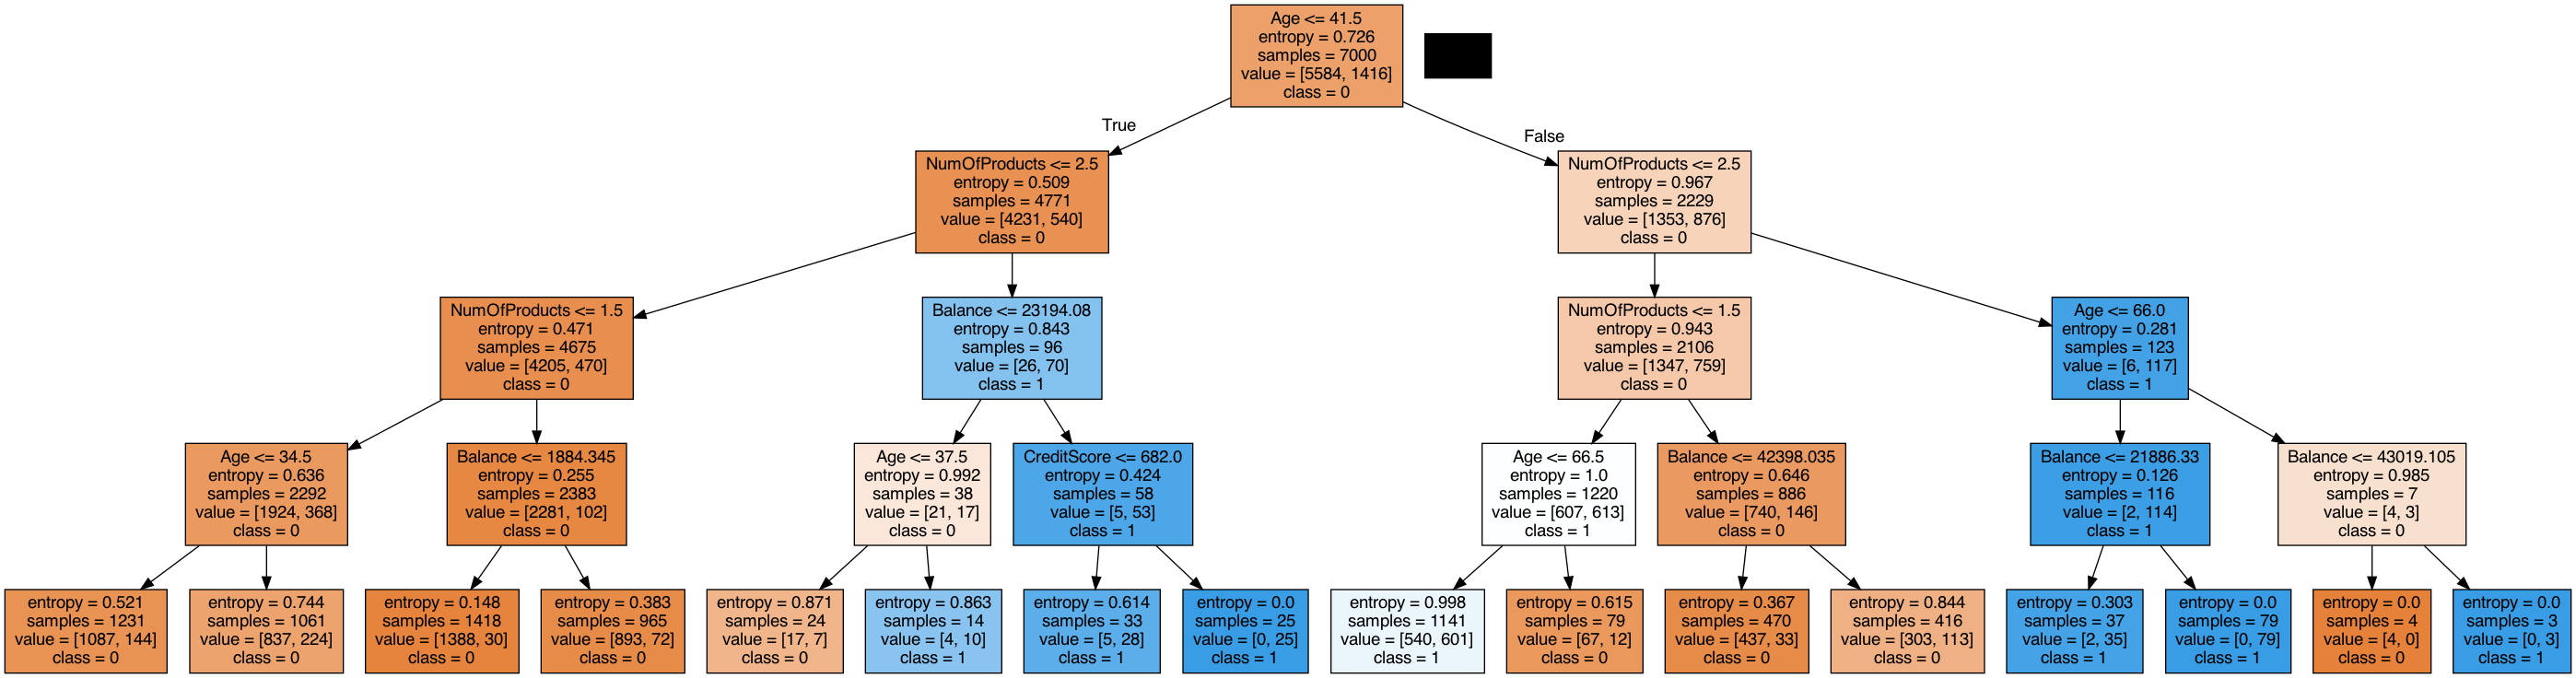

In [67]:
import pydotplus 
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, feature_names=x.columns, class_names=['0','1'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Logistic Regression (Logit)

We apply logistic regression of varying strength to the train and test.

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
Accuracy :  0.7843333333333333


Text(0, 0.5, 'Accuracy')

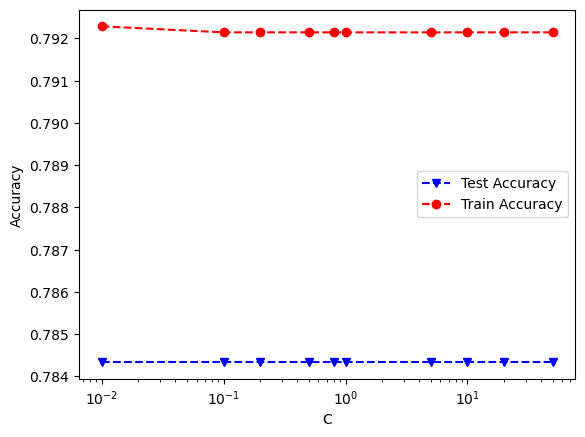

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

#C = Inverse of regularization strength;  smaller values specify stronger regularization.
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

#finding test accuracy and train accuracy
LRtestAcc = []
LRtrainAcc = []

#for loop that applies logistic regression at different C levels and stores values to lists
for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(x_train,y_train)
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x_train)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_train,log_reg_pred_train))
    
 #display accuracy of test   
print ("Accuracy : ",  accuracy_score(y_test, log_reg_pred))

#display a plot
plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

## Naive Bayes
SVC = Linear Approach <br />
SVM = Non Linear Approach

In [69]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(x,y)
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

[0 0 0 ... 0 1 0]
Accuracy on test data is 0.78


## Support Vector Machine (SVM) Classifer
C = the penalty imposed on incorrect placed data points  <br />
C = 2 meaning there is a penalty of 2 units for every wrongly identified points

In [70]:
from sklearn import svm

svmClassifier = svm.SVC(kernel='linear', gamma='auto', C=2)
svmClassifier.fit(x_train, y_train)

y_svmPred = svmClassifier.predict(x_test)

In [71]:
from sklearn.metrics import classification_report

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_svmPred)))
print(classification_report(y_test, y_svmPred))

Accuracy on test data is 0.78
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2379
           1       0.37      0.10      0.16       621

    accuracy                           0.78      3000
   macro avg       0.59      0.53      0.51      3000
weighted avg       0.71      0.78      0.72      3000



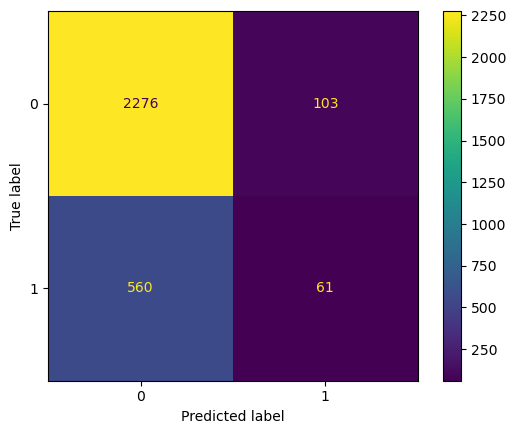

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_svmPred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmClassifier.classes_)

disp.plot()

plt.show()

This code block applies the non-linear SVM classifier which uses the C parameter to affect the accuracy and predicted results. After running, a graph is generated for the test and train accuracy depending on the C parameter.

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Accuracy')

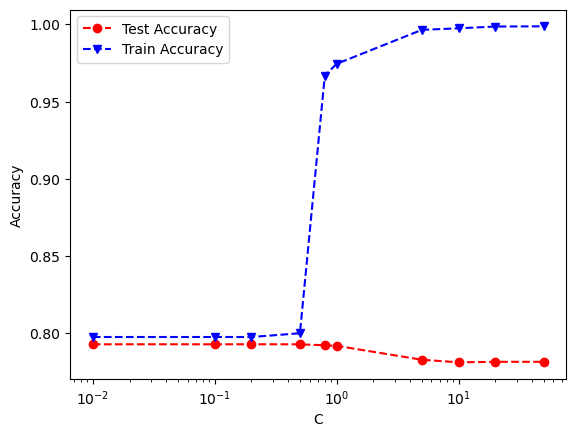

In [73]:
from sklearn.svm import SVC
svc = SVC()

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
 

SVMLtestAcc = []
SVMLtrainAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(x_train,y_train)
    svml_pred = clf.predict(x_test)
    svml_pred_train = clf.predict(x_train)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    SVMLtrainAcc.append(accuracy_score(y_train,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy') 

## K-Nearest Neighbor (KNN) Classifiers

Accuracy on test data using k=5 is 0.75
Accuracy on train data using k=5 is 0.82
Accuracy on test data using k=10 is 0.79
Accuracy on train data using k=10 is 0.80
Accuracy on test data using k=20 is 0.79
Accuracy on train data using k=20 is 0.80
Accuracy on test data using k=30 is 0.79
Accuracy on train data using k=30 is 0.80
Accuracy on test data using k=40 is 0.79
Accuracy on train data using k=40 is 0.80


Text(0, 0.5, 'Accuracy')

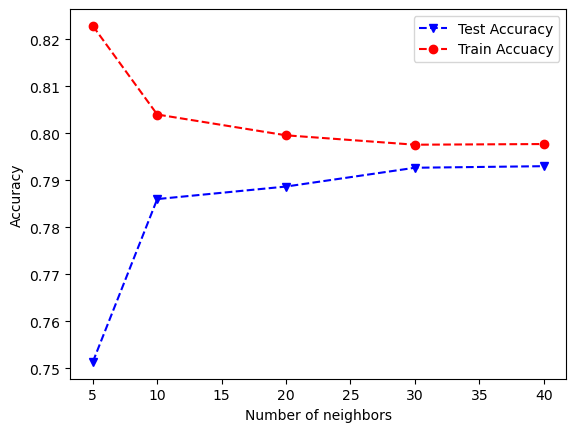

In [76]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [5, 10, 20, 30, 40]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    knn_pred = clf.predict(x_test)
    knn_pred_train = clf.predict(x_train)
    # print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y_train,knn_pred_train))
    print('Accuracy on test data using k=%i is %.2f' % (k, accuracy_score(y_test, knn_pred)))
    print('Accuracy on train data using k=%i is %.2f' % (k, accuracy_score(y_train, knn_pred_train)))
    
plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

The K-value that seems to be an accurate representation of the model is when k >= 30 as we can see on the graph. When comparing the two lines, training and testing, we see that the model stops and stay on a constant value on the graph 0.79 and 0.8. Upon analyizing this, we can tell that the accuracy of the model using the KNN technique is around 0.79 ~ 0.8.